<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
    Import Necessary Libraries & Dataset
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
infy=pd.read_csv("/kaggle/input/infosys-stock/INFY.csv")
infy.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,INFOSYSTCH,EQ,408.00,407.0,407.9,405.00,NaN,407.90,406.48,400,1.625900e+10,NaN,NaN,NaN
1,1996-01-02,INFOSYSTCH,EQ,407.90,407.0,409.0,406.25,NaN,406.25,407.58,400,1.630300e+10,NaN,NaN,NaN
2,1996-01-03,INFOSYSTCH,EQ,406.25,409.0,409.0,409.00,NaN,409.00,409.00,200,8.180000e+09,NaN,NaN,NaN
3,1996-01-04,INFOSYSTCH,EQ,409.00,405.0,407.0,405.00,NaN,406.30,405.65,600,2.433900e+10,NaN,NaN,NaN
4,1996-01-05,INFOSYSTCH,EQ,406.30,401.5,401.5,401.50,NaN,401.50,401.50,100,4.015000e+09,NaN,NaN,NaN


In [3]:
infy.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
6343,2021-06-25,INFY,EQ,1559.20,1572.00,1578.00,1543.00,1574.00,1574.20,1565.12,9780240,1.530725e+15,192643.0,5825533.0,0.5956
6344,2021-06-28,INFY,EQ,1574.20,1572.90,1580.15,1560.60,1569.10,1571.80,1570.82,5019178,7.884238e+14,136591.0,3354874.0,0.6684
6345,2021-06-29,INFY,EQ,1571.80,1561.00,1573.65,1559.20,1562.00,1563.05,1564.66,5913567,9.252700e+14,197132.0,3844762.0,0.6502
6346,2021-06-30,INFY,EQ,1563.05,1572.05,1591.00,1572.05,1580.00,1580.80,1582.44,6058722,9.587563e+14,167938.0,3226132.0,0.5325
6347,2021-07-01,INFY,EQ,1580.80,1576.85,1576.85,1559.05,1561.95,1560.40,1565.56,4814317,7.537112e+14,150925.0,2996603.0,0.6224


In [4]:
infy.shape

(6348, 15)

In [5]:
infy.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6348.000000,6348.000000,6348.000000,6348.000000,5802.000000,6348.000000,6348.000000,6.348000e+03,6.348000e+03,2.501000e+03,4.843000e+03,4843.000000
mean,2539.425709,2540.989540,2583.785562,2496.244179,2681.667210,2539.725347,2540.613333,2.242025e+06,3.312103e+14,1.125723e+05,1.592267e+06,0.536876
std,1860.218523,1864.039102,1911.273735,1812.708743,1878.162415,1859.932641,1863.261538,3.972758e+06,3.769973e+14,8.972074e+04,2.271872e+06,0.178839
min,0.000000,390.750000,392.000000,365.000000,529.150000,390.750000,390.470000,1.000000e+02,4.015000e+09,1.350000e+03,4.352000e+03,0.045800
25%,1181.175000,1181.000000,1195.000000,1165.000000,1301.625000,1181.425000,1180.735000,4.977122e+05,1.578150e+14,5.972100e+04,4.110275e+05,0.456850
50%,2223.775000,2223.000000,2250.000000,2193.625000,2342.025000,2223.775000,2223.815000,9.989310e+05,2.581044e+14,9.168400e+04,8.119100e+05,0.580200
75%,3104.562500,3102.225000,3153.450000,3052.437500,3210.000000,3104.562500,3106.717500,2.305781e+06,3.995945e+14,1.371390e+05,2.044642e+06,0.663250
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
    Exploratory Data Analysis(EDA)
</p>


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

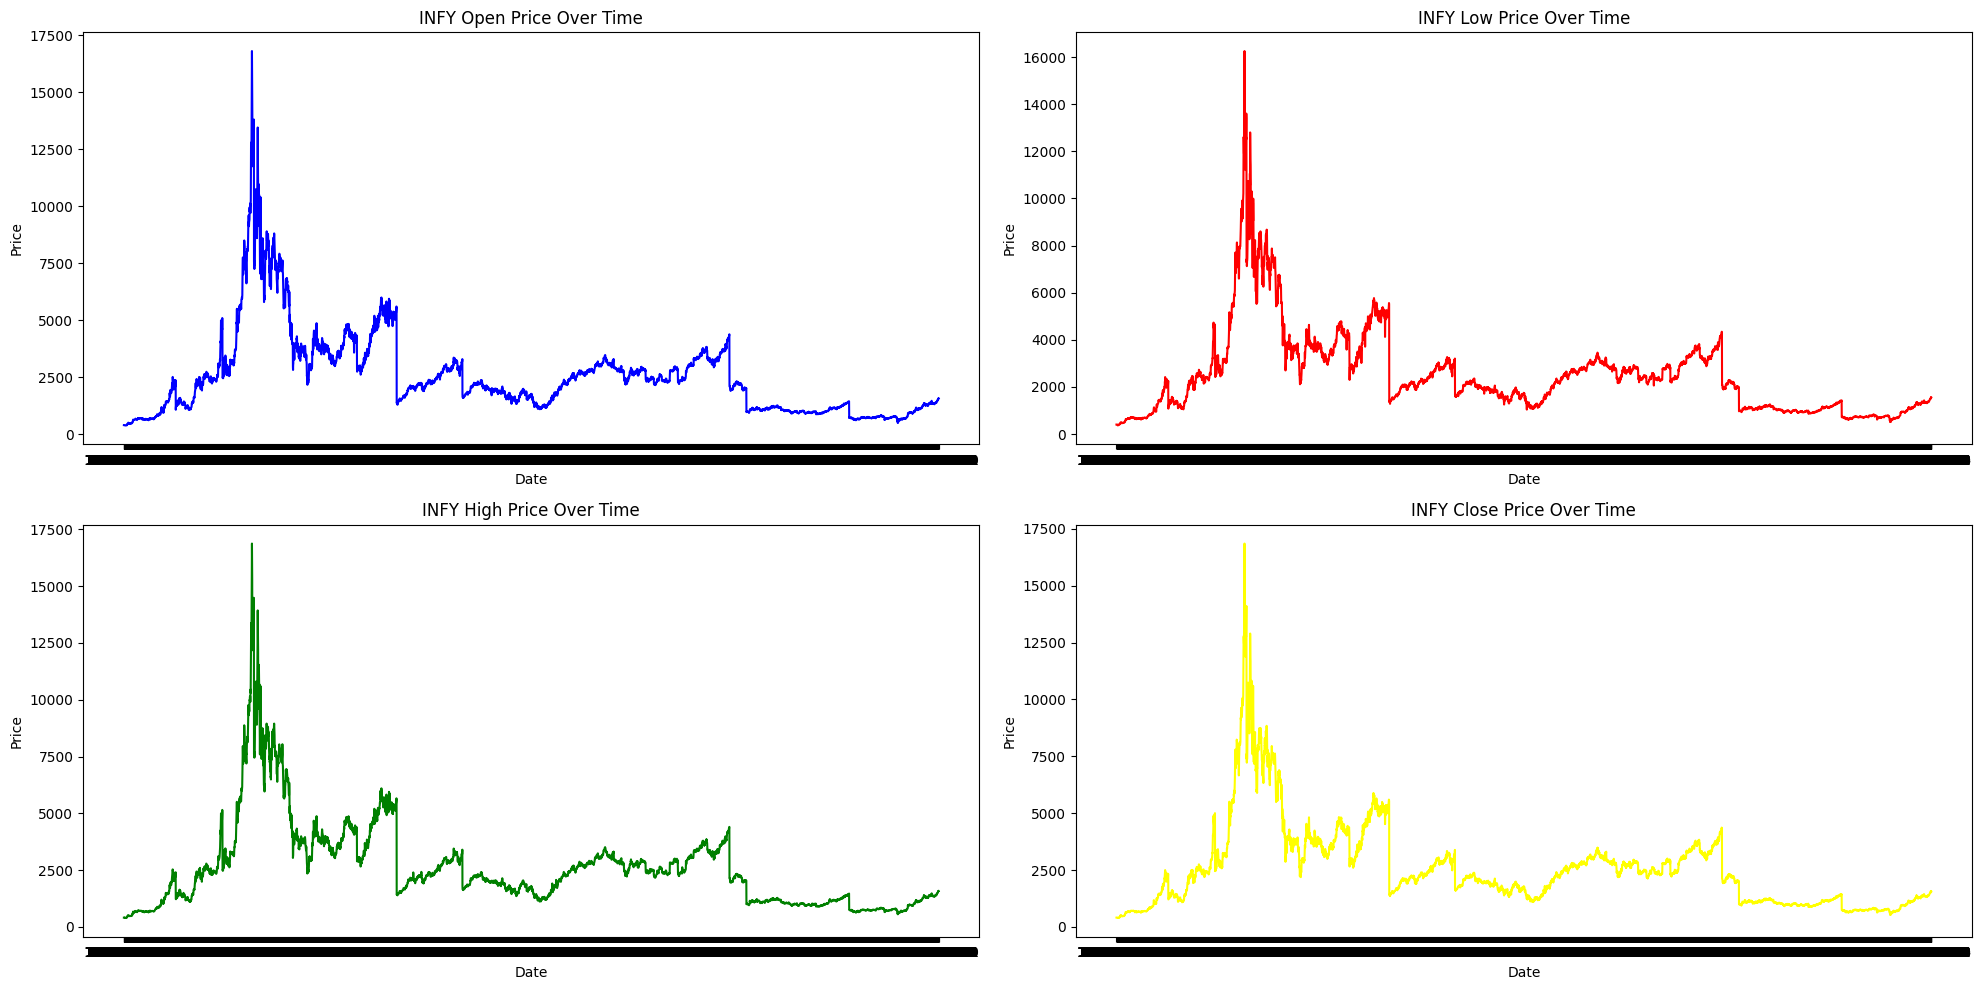

In [6]:
# Plot trends for Open, Low, High, and Close prices over time
features = ['Open', 'Low', 'High', 'Close']
titles = ['Open Price', 'Low Price', 'High Price', 'Close Price']
colors = ['blue', 'red', 'green', 'yellow']

plt.figure(figsize=(20, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='Date', y=features[i], data=infy, color=colors[i])
    plt.title(f'INFY {titles[i]} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()



All price metrics generally exhibit an upward trend over time, reflecting long-term growth in Infosys stock. However, noticeable short-term volatility suggests periodic market fluctuations and corrections.

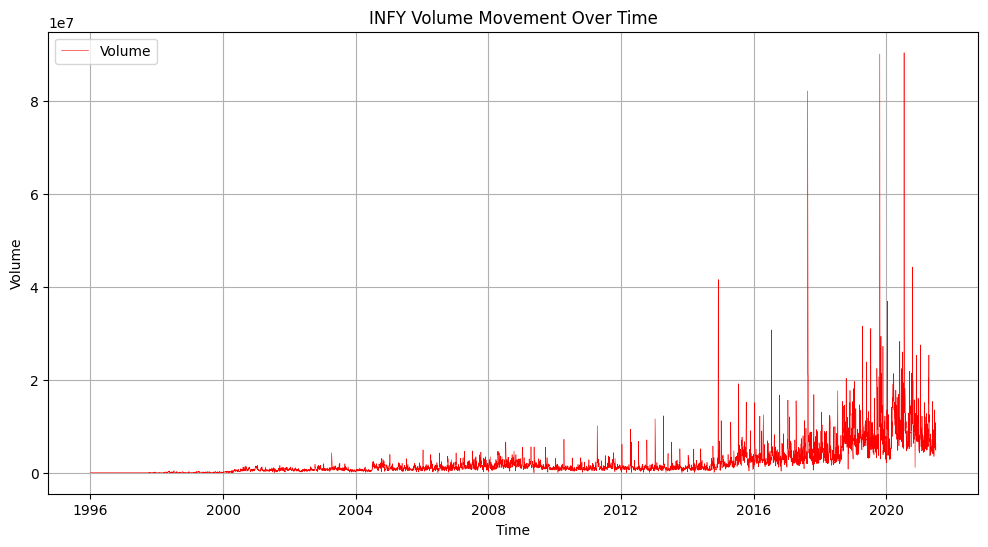

In [7]:
# Convert 'Date' column to datetime format
infy['Date'] = pd.to_datetime(infy['Date'])

# Plot trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(infy['Date'], infy['Volume'], label='Volume', color='red', linewidth=0.4)
plt.title('INFY Volume Movement Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()


Volume shows significant spikes at various intervals, indicating increased investor interest or activity during specific periods—possibly due to earnings reports, economic events, or market news.

/tmp/ipykernel_31/4132481247.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/tmp/ipykernel_31/4132481247.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(infy[col])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_31/4132481247.py:8: UserWarning: 

`distplot` is

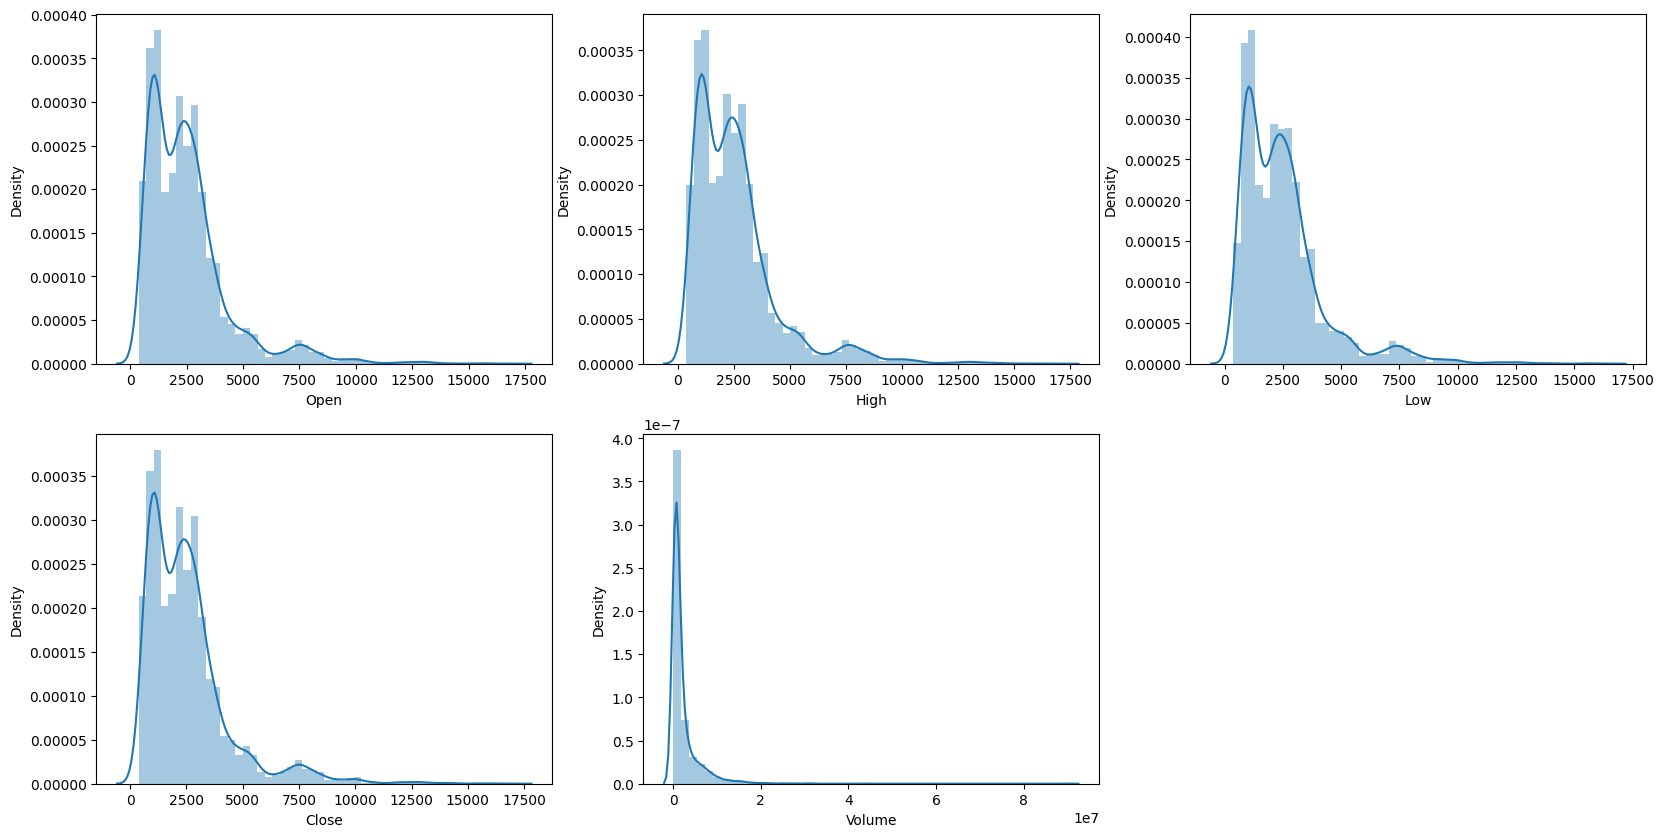

In [8]:
# Visualize the distribution of each feature
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(infy[col])
plt.show()


Price distributions (Open, High, Low, Close) are slightly right-skewed, implying more occurrences of lower prices historically. Volume distribution is highly skewed, suggesting frequent low-volume trading days with occasional high spikes.

/tmp/ipykernel_31/48495169.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


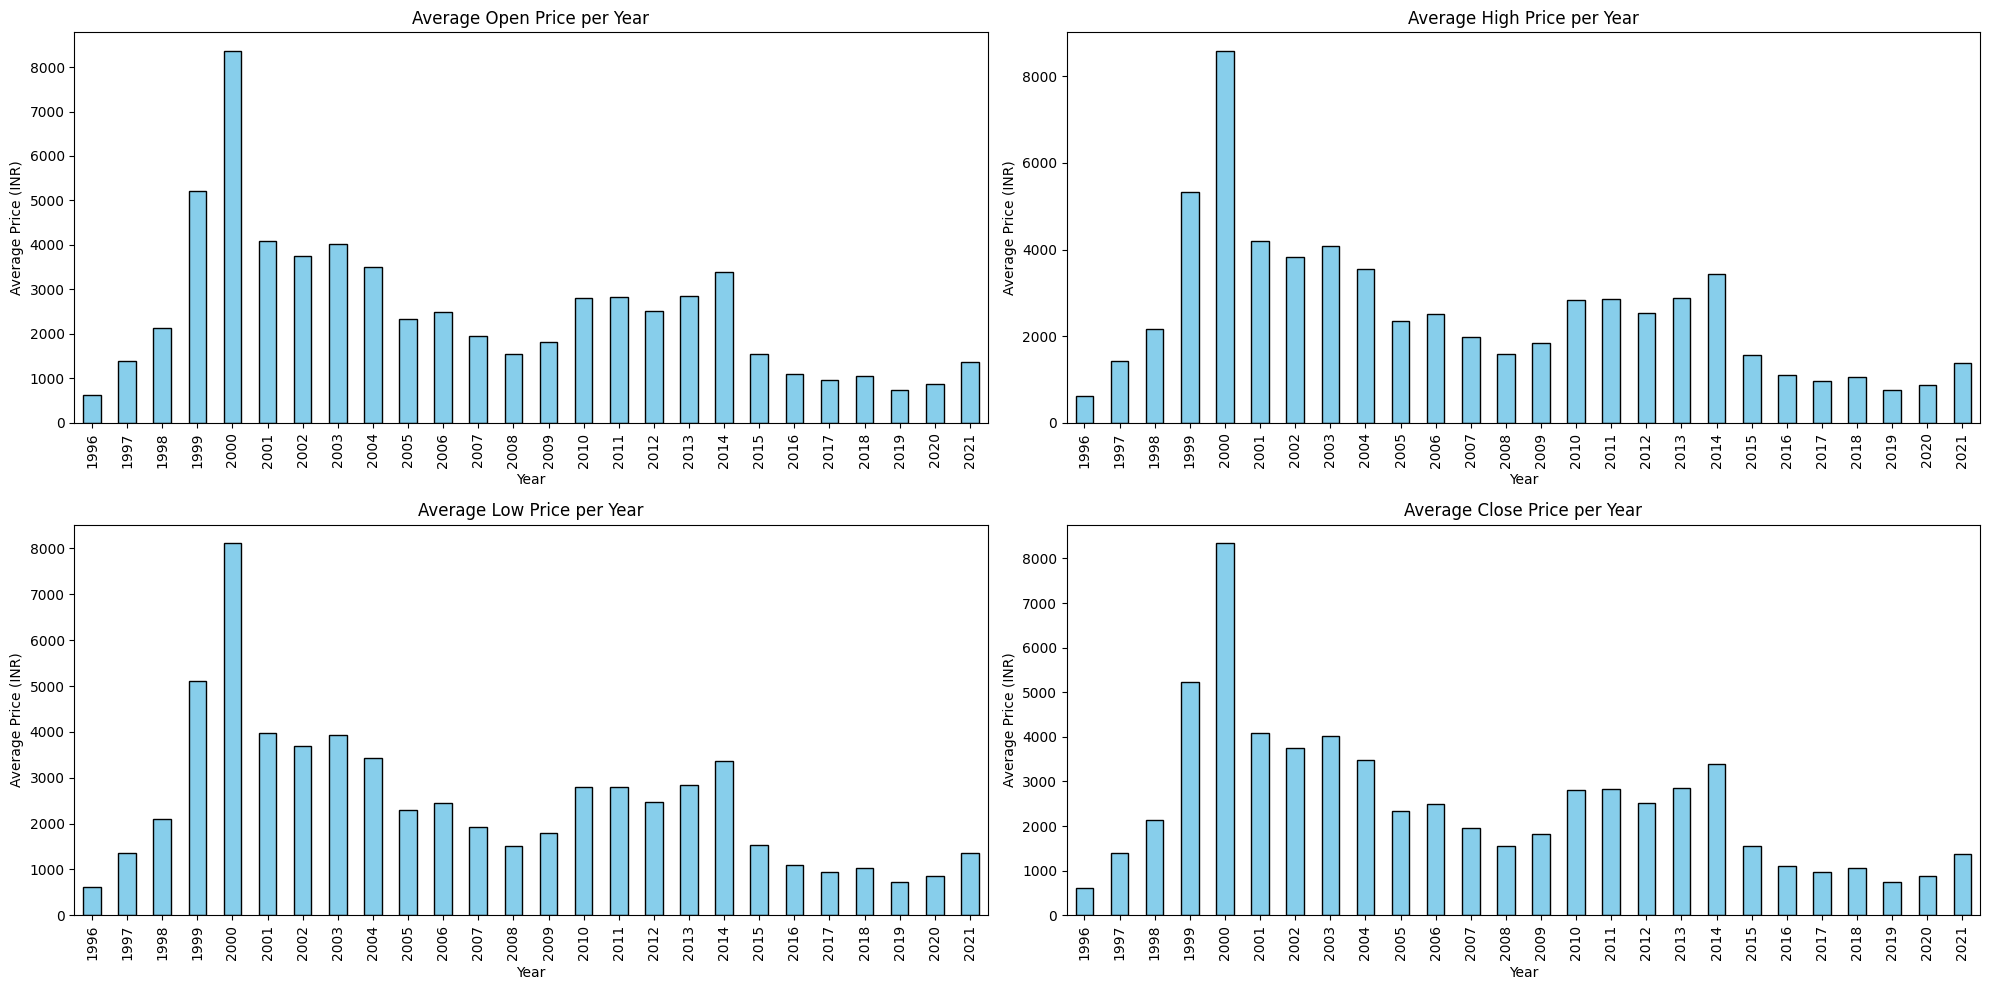

In [9]:
# Extract the year from each date
infy['year'] = infy['Date'].dt.year

# Select only numeric columns to avoid grouping errors
numeric_cols = infy.select_dtypes(include='number')

# Group numeric data by year and calculate the mean
data_grouped = numeric_cols.groupby(infy['year']).mean()

# Plot average Open, High, Low, and Close prices per year
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar(color='skyblue', edgecolor='black')
    plt.title(f'Average {col} Price per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Price (INR)')

plt.tight_layout()
plt.show()

Each price metric exhibits a clear rising pattern year-over-year, underscoring Infosys’s steady stock growth. Sharp upward slopes in some years indicate periods of accelerated valuation, likely driven by favorable company performance or tech sector momentum.

In [10]:
infy.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                   546
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3847
Deliverable Volume    1505
%Deliverble           1505
year                     0
dtype: int64

**No null values in our target columns**

<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
    Data Preprocessing & Feature Engineering
</p>


In [11]:
infy.drop(['Date', 'Symbol', 'Series', 'Prev Close', 'Last', 'VWAP', 
           'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble','year'], axis=1, inplace=True)


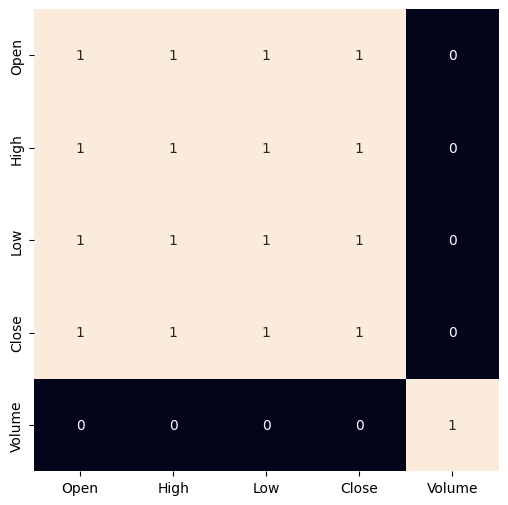

In [12]:
#Heatmap to understand feature correlation
plt.figure(figsize=(6, 6))  
sns.heatmap(infy.corr()>0.9, annot=True, cbar=False)
plt.show()


As we had seen in the plots of OHLC, all are nearly similar, and so is the observation of features in the correlation.

In [13]:
infy['Target'] = infy['Close'].shift(-1)


In [14]:
infy.dropna(inplace=True)


In [15]:
infy.head()

,Open,High,Low,Close,Volume,Target
0,407.0,407.9,405.00,407.90,400,406.25
1,407.0,409.0,406.25,406.25,400,409.00
2,409.0,409.0,409.00,409.00,200,406.30
3,405.0,407.0,405.00,406.30,600,401.50
4,401.5,401.5,401.50,401.50,100,404.00


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Model Training
</p>


In [16]:
#Define Features and Target
X = infy[['Open', 'High', 'Low', 'Close']].values
y = infy['Target'].values

#Train-test split(80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # Keep time order intact
)

#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((5077, 4), (1270, 4), (5077,), (1270,))

<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Linear Regression Model
</p>


In [17]:
LR_Model=LinearRegression()
LR_Model.fit(X_train_scaled , y_train)


LinearRegression()

In [18]:
y_pred_LR=LR_Model.predict(X_test_scaled)
print(f"Predictions{y_pred_LR}")

Predictions[1220.85376612 1217.51892862 1212.55631025 ... 1579.07982543 1570.0950069
 1587.8122832 ]


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   K-nearest Neighbours
</p>


In [19]:
KNN_Model=KNeighborsRegressor(n_neighbors=4)
KNN_Model.fit(X_train_scaled , y_train)


KNeighborsRegressor(n_neighbors=4)

In [20]:
y_pred_KNN=KNN_Model.predict(X_test_scaled)
print(f"predictions{y_pred_KNN}")

predictions[1226.35   1209.35   1207.45   ... 1588.3875 1553.9875 1581.7   ]


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Support Vector Regression Model
</p>


In [21]:
SVR_Model= SVR(kernel='rbf')
SVR_Model.fit(X_train_scaled,y_train)


SVR()

In [22]:
y_pred_SVR=SVR_Model.predict(X_test_scaled)
print(f"Predictions{y_pred_SVR}")

Predictions[1642.21505059 1640.51567222 1640.95662992 ... 1754.0195663  1750.68290948
 1757.71374958]


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Decision Tree
</p>


In [23]:
decision_tree= DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_pred_DT=decision_tree.predict(X_test_scaled)
print(f"Predictions{y_pred_DT}")

Predictions[1243.15 1207.25 1201.05 ... 1569.3  1577.45 1615.15]


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Evaluation Metrics
</p>


In [25]:
results = {}

results['Linear Regression'] = {
    'RMSE': mean_squared_error(y_test, y_pred_LR, squared=False),
    'MAE': mean_absolute_error(y_test, y_pred_LR),
    'R2 Score': r2_score(y_test, y_pred_LR)
}

results['KNN Regression'] = {
    'RMSE': mean_squared_error(y_test, y_pred_KNN, squared=False),
    'MAE': mean_absolute_error(y_test, y_pred_KNN),
    'R2 Score': r2_score(y_test, y_pred_KNN)
}

results['SVR'] = {
    'RMSE': mean_squared_error(y_test, y_pred_SVR, squared=False),
    'MAE': mean_absolute_error(y_test, y_pred_SVR),
    'R2 Score': r2_score(y_test, y_pred_SVR)
}

results['Decision Tree'] = {
    'RMSE': mean_squared_error(y_test, y_pred_DT, squared=False),
    'MAE': mean_absolute_error(y_test, y_pred_DT),
    'R2 Score': r2_score(y_test, y_pred_DT)
}

results_df = pd.DataFrame(results).T
print("Classical Regression Model Performance")
results_df

Classical Regression Model Performance


,RMSE,MAE,R2 Score
Linear Regression,25.902468,12.940205,0.987108
KNN Regression,29.318233,16.769213,0.983484
SVR,723.523543,684.162037,-9.058518
Decision Tree,37.607133,22.996535,0.972825


While Linear Regression delivered the best performance among the four machine learning algorithms evaluated, it is ultimately a simple model with limited capacity to capture temporal dependencies. Since time-series analysis demands an understanding of complex patterns and sequential trends, we turn to a more powerful and widely adopted approach: Long Short-Term Memory (LSTM) networks. LSTM models are specifically designed to learn from sequential data, making them a more suitable choice for our forecasting tasks.

<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Training LSTM Model
</p>


In [26]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# For reproducibility
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)


2025-06-30 03:47:17.343066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751255237.540419      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751255237.602171      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
# features for our model
data = infy[['Open', 'High', 'Low','Close']].dropna()

# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Scale 'Close' for use in model evaluation & inverse transformation
scaler_close = MinMaxScaler()
scaled_close = scaler_close.fit_transform(data[['Close']])


In [28]:
# Sequence length 
sequence_length = 60

X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i])         
    y_lstm.append(scaled_close[i])                           

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print("X shape:", X_lstm.shape)
print("y shape:", y_lstm.shape)
print(y_lstm[-5:])


X shape: (6287, 60, 4)
y shape: (6287, 1)
[[0.07096504]
 [0.07187605]
 [0.07173029]
 [0.07119887]
 [0.0722769 ]]


In [29]:
#split the dataset
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, shuffle=False  
)


In [30]:
#LSTM model architecture
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer(future close price)

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


I0000 00:00:1751255250.229665      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751255250.230359      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
#early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=25,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/25


I0000 00:00:1751255255.322009      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0056 - val_loss: 1.1324e-04
Epoch 2/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1900e-04 - val_loss: 1.5458e-05
Epoch 3/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3665e-04 - val_loss: 1.1050e-05
Epoch 4/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1669e-04 - val_loss: 6.1115e-05
Epoch 5/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6813e-04 - val_loss: 6.9197e-05
Epoch 6/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2347e-04 - val_loss: 3.6604e-05
Epoch 7/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3614e-04 - val_loss: 4.1450e-05
Epoch 8/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3262e-04 - val_loss: 8.0193e-06
Epoch 9/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5833e-04 - val_loss: 5.8740e-05
Epoch 10/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8304e-04 - val_loss: 5.8205e-05
Epoch 11/25
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7801e-04 -

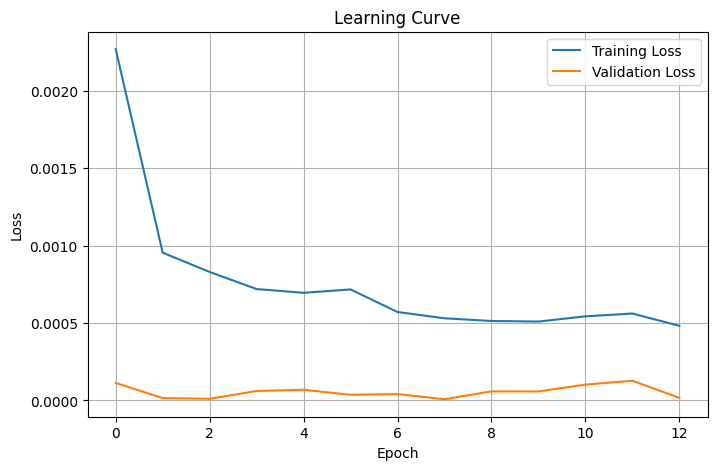

In [32]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Evaluation Metrics
</p>


In [33]:
# Predict on test set
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler_close.inverse_transform(y_pred_scaled)
y_true = scaler_close.inverse_transform(y_test_lstm)

# Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RMSE: 46.63
MAE: 29.06
R² Score: 0.9579


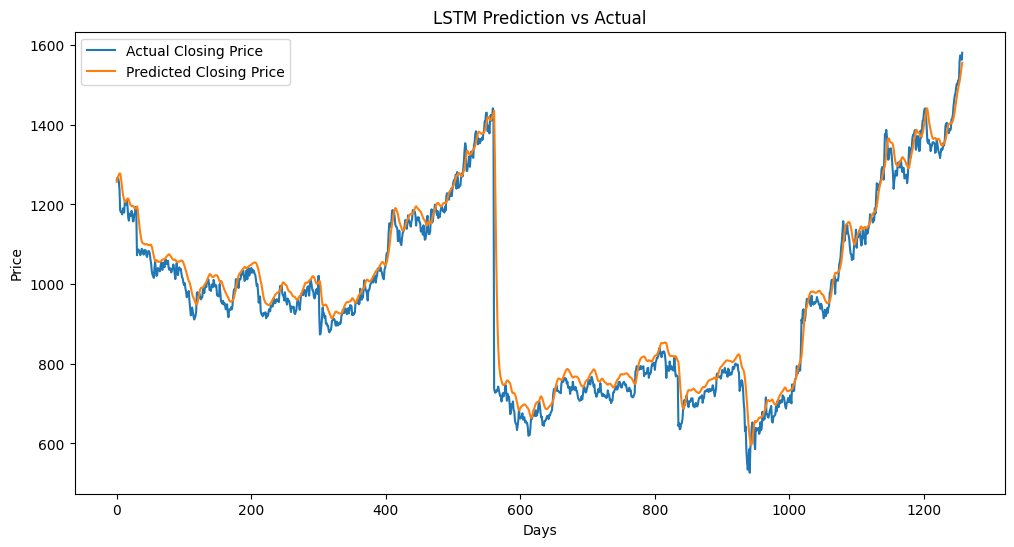

In [34]:
# Plot actual vs. predicted closing prices
plt.figure(figsize=(12,6))
plt.plot(y_true, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Further Predictions
</p>


In [35]:
# Take last 60 days from full scaled data
last_sequence = scaled_data[-60:]

# Reshape to LSTM input (1 sample, 60 timesteps, features)
last_sequence = np.expand_dims(last_sequence, axis=0)
print("Last sequence shape:", last_sequence.shape)


Last sequence shape: (1, 60, 4)


In [36]:
# Start with the last 60 days of data (with 4 features)
last_sequence = scaled_data[-60:]
last_sequence = np.expand_dims(last_sequence, axis=0)

# Generate predictions for the next 30 days
future_predictions_scaled = []

for _ in range(30):
    next_pred_scaled = model.predict(last_sequence)[0]  # Predict next closing price (scaled)

    # Store the predicted value
    future_predictions_scaled.append(next_pred_scaled)

    # Create the next input by shifting the sequence and updating the 'Close' value
    new_row = last_sequence[:, -1, :].copy()
    new_row[0, -1] = next_pred_scaled  # Replace only the Close value

    # Append new row to the sequence
    next_input = np.concatenate((last_sequence[:, 1:, :], new_row.reshape(1, 1, last_sequence.shape[2])), axis=1)
    last_sequence = next_input


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/tmp/ipykernel_31/3083320346.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0, -1] = next_pred_scaled  # Replace only the Close value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [37]:
# Convert list to numpy array
future_predictions_scaled = np.array(future_predictions_scaled)

# Inverse transform Close price
future_predictions = scaler_close.inverse_transform(future_predictions_scaled)

print("Next 30 days predicted Close prices:")
print(future_predictions.flatten())


Next 30 days predicted Close prices:
[1565.2806 1572.5125 1577.8279 1581.686  1584.4603 1586.4436 1587.8579
 1588.8682 1589.5945 1590.1223 1590.5123 1590.8062 1591.0328 1591.2118
 1591.3566 1591.4758 1591.5758 1591.6605 1591.733  1591.7953 1591.8488
 1591.8949 1591.9343 1591.9684 1591.9973 1592.022  1592.043  1592.0607
 1592.0757 1592.0885]


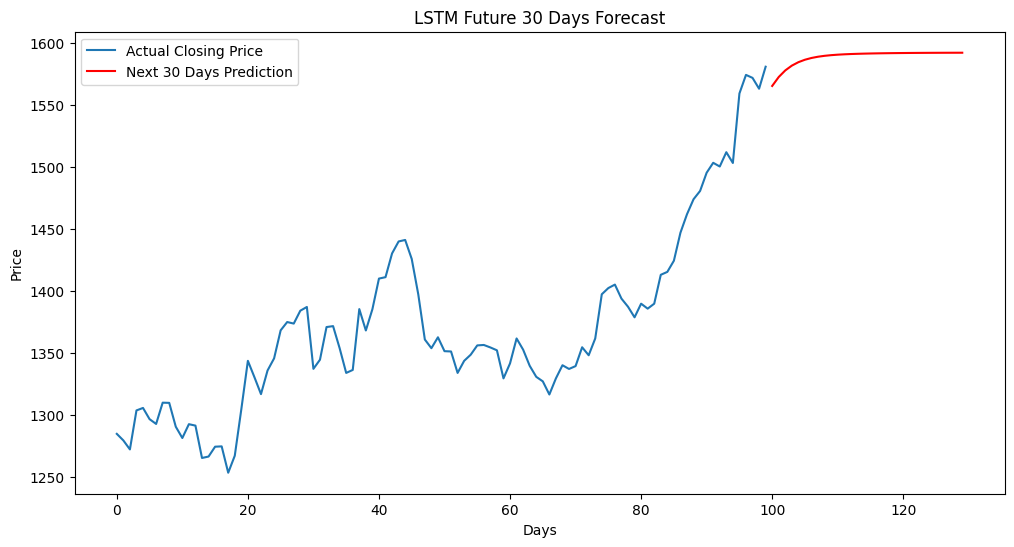

In [38]:
# Plot actual closing prices along with the next 30-day forecast
plt.figure(figsize=(12, 6))

# Last 100 actual closing prices
plt.plot(range(len(y_true[-100:])), y_true[-100:], label='Actual Closing Price')

# Next 30 predicted closing prices
plt.plot(range(len(y_true[-100:]), len(y_true[-100:]) + 30), future_predictions, label='Next 30 Days Prediction', color='red')

plt.title("LSTM Future 30 Days Forecast")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


<p style="background-color: white; padding: 10px; font-family: 'Brush Script MT', cursive; color: black; font-size: 36px;">
   Comparing future predictions with Actual Price
</p>


In [40]:
import pandas as pd

# Actual Infosys closing prices 
actual_closing_prices = [
    1560.75, 1562.20, 1578.95, 1562.00, 1547.85, 1533.75, 1536.30, 1538.10,
    1555.45, 1549.60, 1537.55, 1538.00, 1561.40, 1585.05, 1611.65, 1609.30,
    1607.60, 1600.10, 1606.15, 1634.75, 1688.65, 1679.90, 1660.00, 1660.65,
    1667.45, 1680.00, 1684.00, 1696.50, 1722.50, 1691.30
]

# Model-predicted closing prices
predicted_prices = [
1565.2806, 1572.5125, 1577.8279, 1581.686, 1584.4603, 1586.4436, 1587.8579,
1588.8682, 1589.5945, 1590.1223, 1590.5123, 1590.8062, 1591.0328, 1591.2118,
1591.3566, 1591.4758, 1591.5758, 1591.6605, 1591.733, 1591.7953, 1591.8488,
1591.8949, 1591.9343, 1591.9684, 1591.9973, 1592.022, 1592.043, 1592.0607,
1592.0757, 1592.0885

]


comparison_df = pd.DataFrame({
    "Day": list(range(1, 31)),
    "Actual Close (₹)": actual_closing_prices,
    "Predicted Close (₹)": predicted_prices
})

comparison_df


,Day,Actual Close (₹),Predicted Close (₹)
0,1,1560.75,1565.2806
1,2,1562.20,1572.5125
2,3,1578.95,1577.8279
3,4,1562.00,1581.6860
4,5,1547.85,1584.4603
5,6,1533.75,1586.4436
6,7,1536.30,1587.8579
7,8,1538.10,1588.8682
8,9,1555.45,1589.5945
9,10,1549.60,1590.1223
